Let's now begin with plotting the annual averages per unit of latitude and longitude. 

In [1]:
import xarray as xarr
import matplotlib.pyplot as plot
import cartopy.crs as ccrs
import cartopy.feature as cfea

# open datafile
dataFile = "CONUS_clipped_precipitation_temperature_1988.nc"
data = xarr.open_dataset(dataFile)

# Kelvin -> Celsius
data["t_celsius"] = data['t'] - 273.15

# calculate averages across continental US
mean_temp = data['t_celsius'].mean(dim='valid_time')
mean_clwc = data['clwc'].mean(dim='valid_time')

# calculate nationwide average across the year
temp_timeseries = data['t_celsius'].mean(dim=['latitude', 'longitude'])
clwc_timeseries = data['clwc'].mean(dim=['latitude', 'longitude'])



Let's plot the annual average temperature across the continental United States.

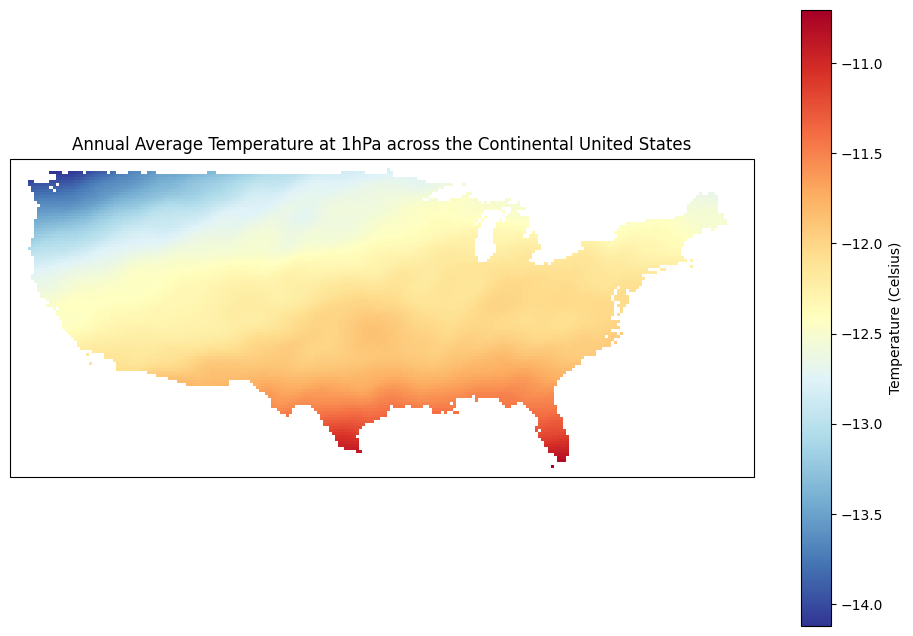

In [2]:
# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
temp_plot = mean_temp.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", add_colorbar=True)
temp_plot.colorbar.set_label("Temperature (Celsius)")

# plot, show
plot.title("Annual Average Temperature at 1hPa across the Continental United States")
plot.show()

Now, let's do the average cloud water content.

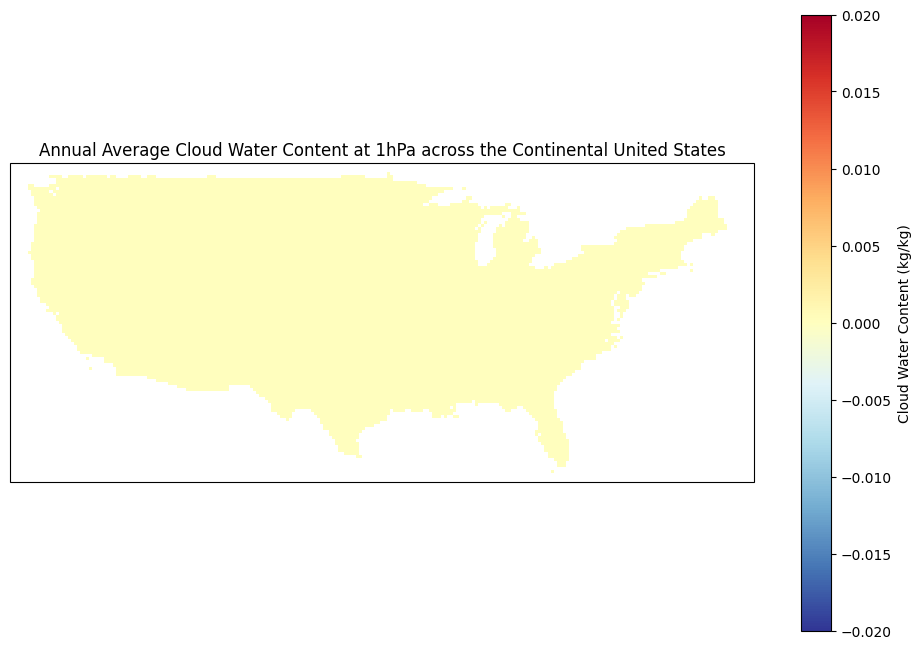

In [3]:
# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
clwc_plot = mean_clwc.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", vmin=-0.02, vmax=0.02, add_colorbar=True)
clwc_plot.colorbar.set_label("Cloud Water Content (kg/kg)")

# plot, show
plot.title("Annual Average Cloud Water Content at 1hPa across the Continental United States")
plot.show()

(The altitude at which the pressure is 1hPa is so extreme that there is essentially zero cloud water content; hence, the near-uniform graph.)

Let's now plot the annual average across the entire continental United States with a graph that shows how temperature changed with time.

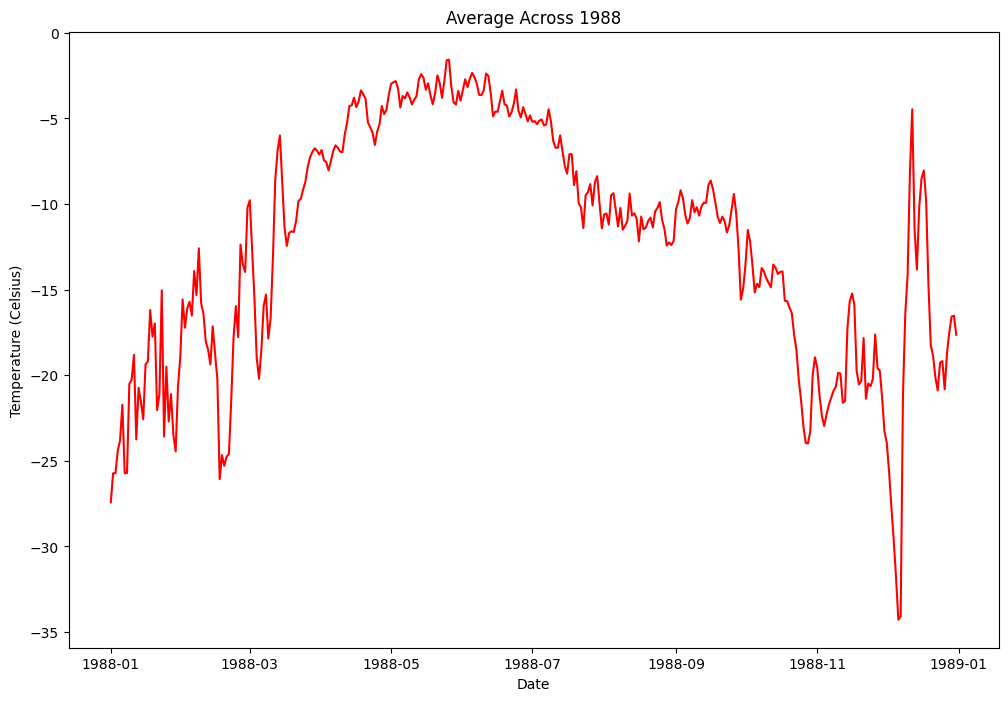

In [ ]:
# create figure
theFigure = plot.subplots(figsize=(12,8))

# need to pass in the times, and then the data
plot.plot(temp_timeseries.valid_time, temp_timeseries, color="red")

# labels
plot.ylabel('Temperature (Celsius)')
plot.xlabel("Date")
plot.title("Average Temperature at 1hPA Across 1988")
plot.show()

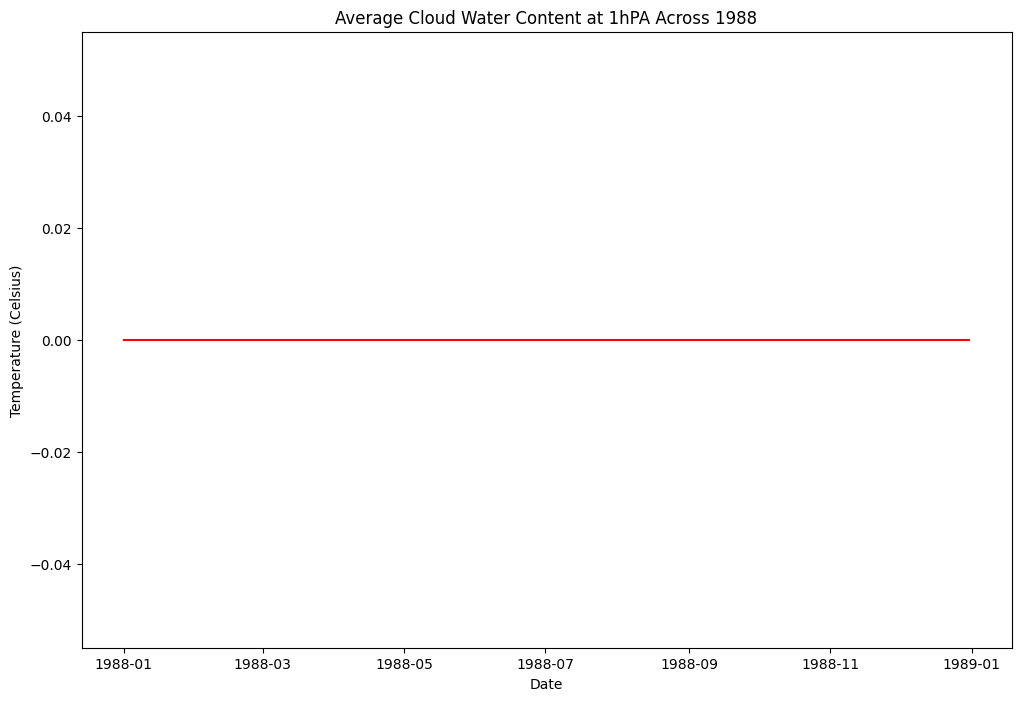

In [5]:
theFigure = plot.subplots(figsize=(12,8))
plot.plot(clwc_timeseries.valid_time, clwc_timeseries, color="red")
plot.ylabel('Temperature (Celsius)')
plot.xlabel("Date")
plot.title("Average Cloud Water Content at 1hPA Across 1988")
plot.show()